### Deep Learning

# Heart Failure Prediction ANN, Pickle, Callback Model

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=pd.read_csv("C:\\Users\\ingri\\OneDrive\\SynergisticPython\\heart_failure_clinical_records_dataset.csv")

In [3]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Check Nulls

In [4]:
x.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## EDA

<Axes: >

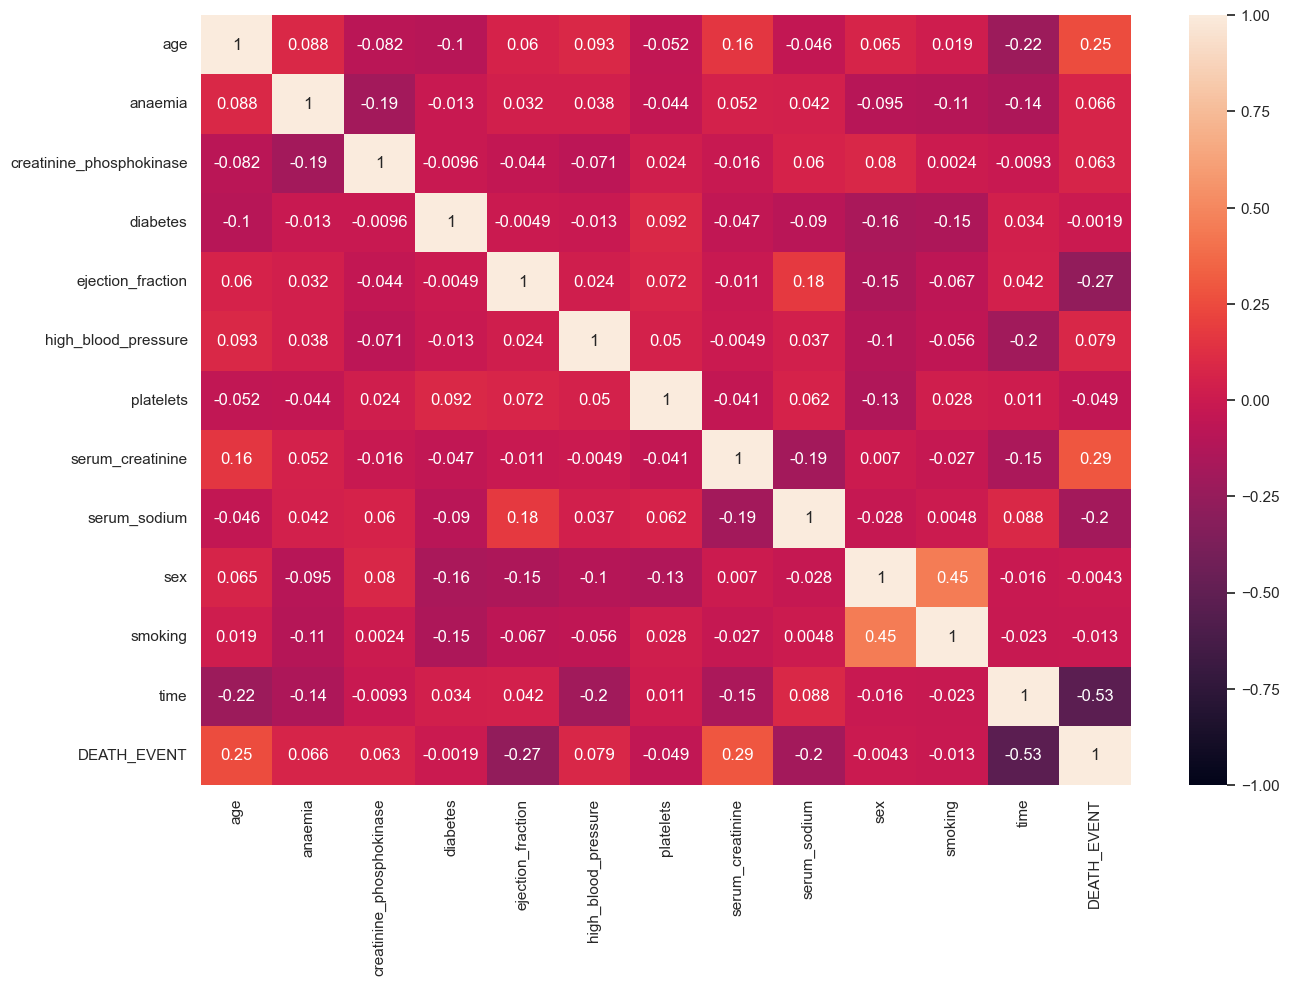

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(pd.get_dummies(x,drop_first=True).corr(),annot=True,vmin=-1)

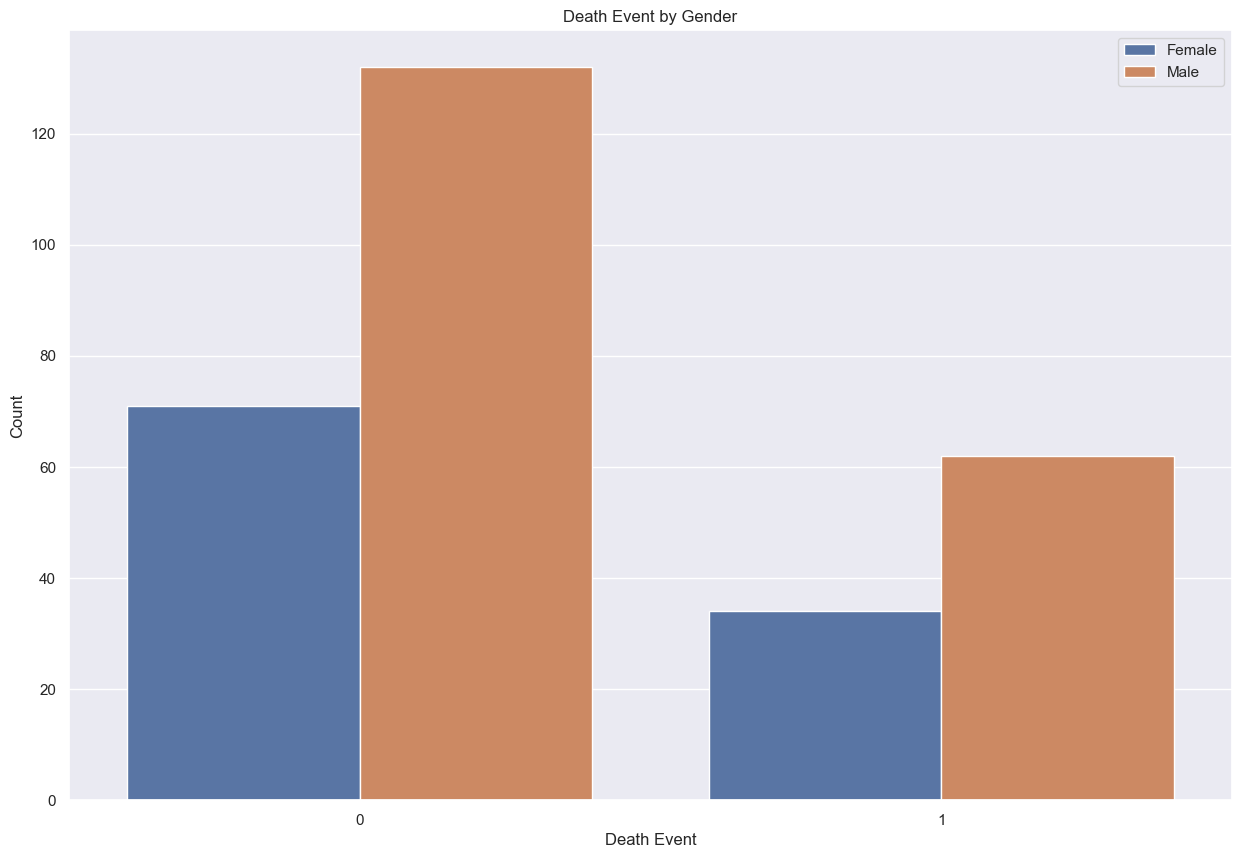

In [6]:
#1 is male
sns.countplot(x='DEATH_EVENT',data=x, hue='sex')
plt.title('Death Event by Gender')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.legend(labels=['Female', 'Male'])
plt.show()

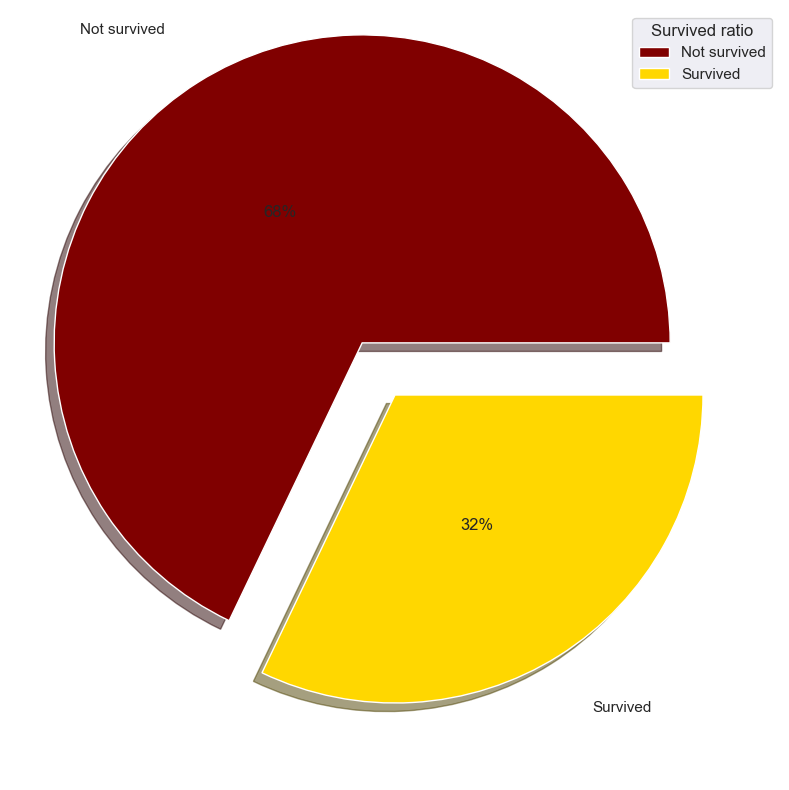

In [7]:
a = x['DEATH_EVENT'].value_counts()
labels = ['Not survived', 'Survived']
explode = [0.2,0] 
colors = ['#898898', '#232323'] 
plt.pie(a, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, explode=explode, colors=['maroon','gold'], shadow = True) 

plt.legend(title = "Survived ratio")
plt.show() 

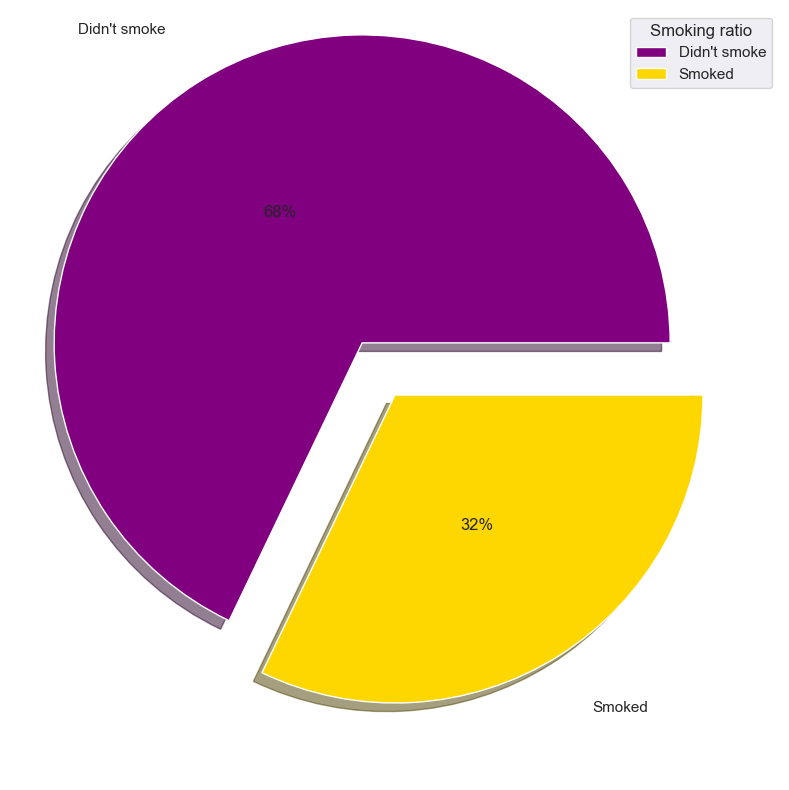

In [8]:
a = x['smoking'].value_counts()
labels = ["Didn't smoke", 'Smoked']
explode = [0.2,0] 
colors = ['#292929', '#767676'] 
plt.pie(a, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, explode=explode, colors=['purple','gold'], shadow = True) 

plt.legend(title = "Smoking ratio")
plt.show() 

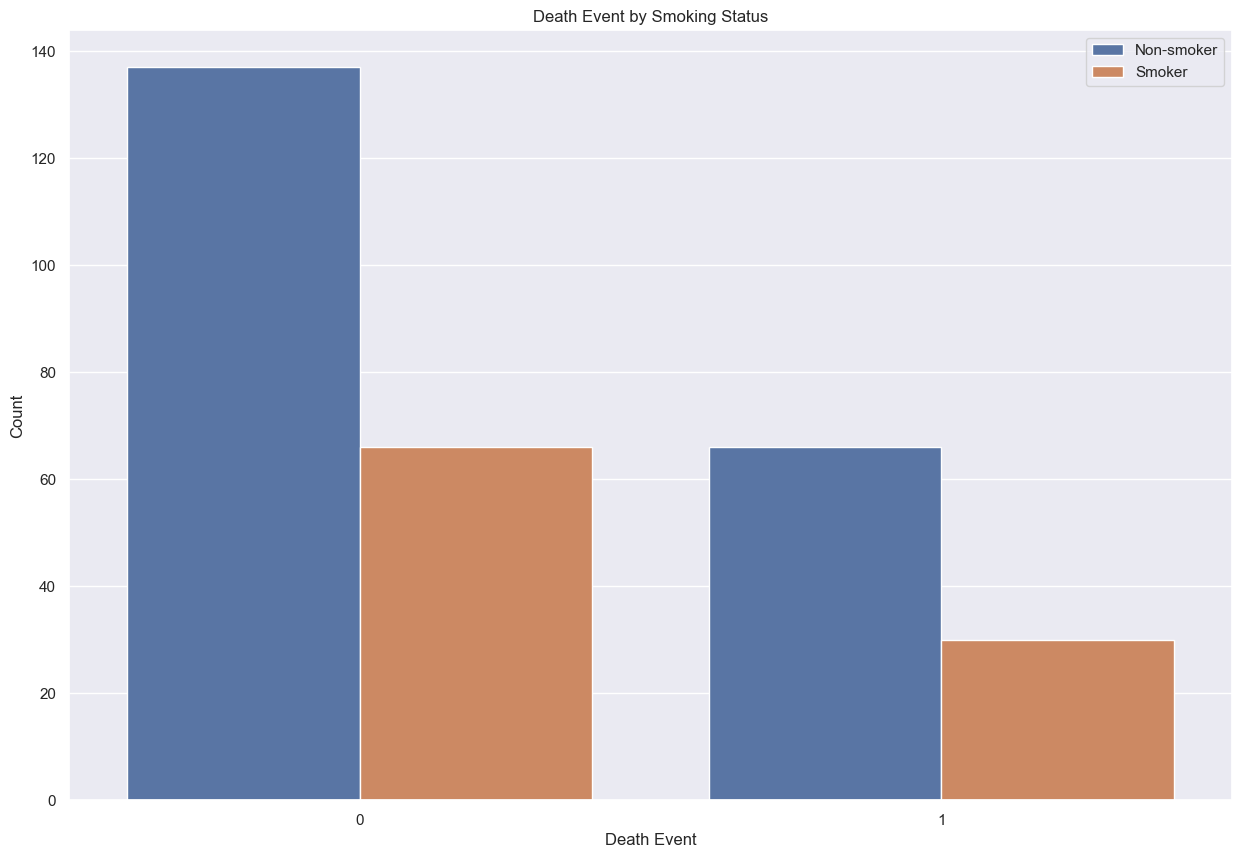

In [9]:
sns.countplot(x='DEATH_EVENT', data=x, hue='smoking')
plt.title('Death Event by Smoking Status')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.legend(labels=['Non-smoker', 'Smoker'])
plt.show()

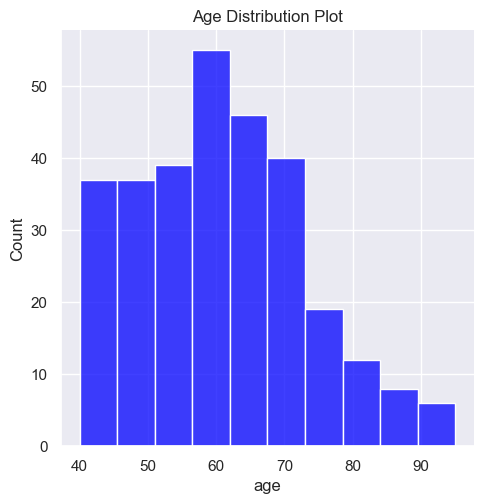

In [10]:
sns.displot(data=x['age'], color='blue')
plt.title('Age Distribution Plot')
plt.show()

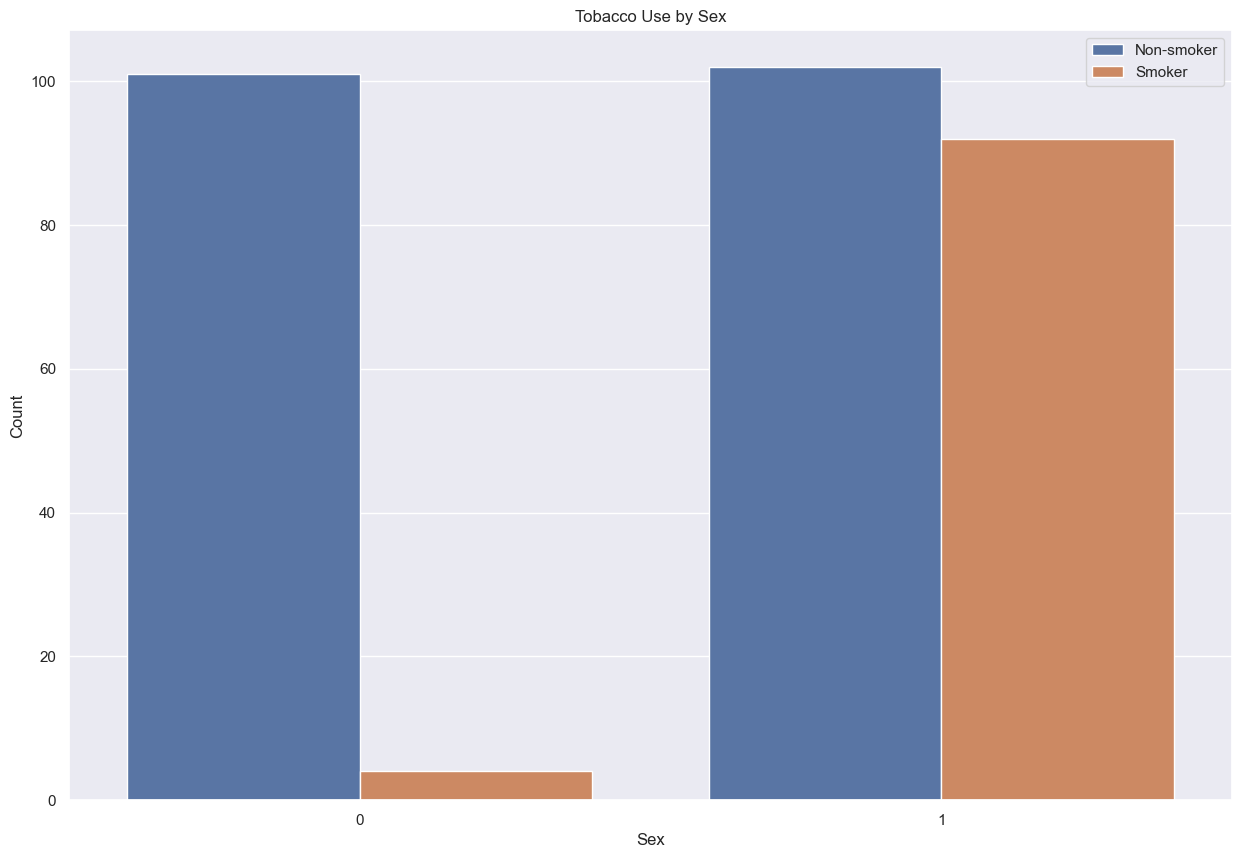

In [11]:
sns.countplot(x='sex', data=x, hue='smoking')
plt.title('Tobacco Use by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(labels=['Non-smoker', 'Smoker'])
plt.show()

## Deep Learning

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
y=x['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x.drop(columns='DEATH_EVENT'),
                                                    x.DEATH_EVENT, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [14]:
print(f'x shape is {x.shape} \n y shape is {y.shape}')                  # Dimensions of our training and testing sets.
print(f'xtest shape is {x_test.shape} \n y shape is {y_test.shape}')

x shape is (299, 13) 
 y shape is (299,)
xtest shape is (90, 12) 
 y shape is (90,)


In [15]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
x_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74


In [17]:
x=x.drop(columns=['DEATH_EVENT'])

x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [18]:
model=Sequential()

In [19]:
model.add(layers.Dense(units=13,activation='relu'))
model.add(layers.Dense(units=26,activation='relu'))
model.add(layers.Dense(units=39,activation='relu'))
model.add(layers.Dense(units=26,activation='relu'))
model.add(layers.Dense(units=1,activation='relu'))

In [20]:
from tensorflow.keras.losses import binary_crossentropy

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 2ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 3/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 4/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 5/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 6/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 7/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 8/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 9/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 10/20
7/7 [==============================] - 0s 1ms/step - loss: 10.9444 - accuracy: 0.2823
Epoch 11/20
7/7 [============

In [23]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 8.9801 - accuracy: 0.4111


[8.980107307434082, 0.41111111640930176]

# By Pickle

In [24]:
import pickle

In [25]:
pickle.dump(model, open('model.pkl','wb'))

In [26]:
pickled_model= pickle.load(open('model.pkl','rb'))

In [27]:
res=pickled_model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [28]:
res

array([[ 2518.109 ],
       [18463.959 ],
       [16736.432 ],
       [19816.977 ],
       [12099.525 ],
       [11712.134 ],
       [10711.438 ],
       [43422.375 ],
       [10416.451 ],
       [ 9643.711 ],
       [13022.557 ],
       [11336.478 ],
       [11172.616 ],
       [11963.87  ],
       [10954.321 ],
       [18872.562 ],
       [12142.985 ],
       [15408.932 ],
       [19602.033 ],
       [13347.458 ],
       [ 9882.42  ],
       [14610.367 ],
       [12553.189 ],
       [13662.102 ],
       [ 9373.102 ],
       [21493.531 ],
       [11942.283 ],
       [13836.498 ],
       [12453.73  ],
       [12656.107 ],
       [ 8404.18  ],
       [13434.667 ],
       [15416.429 ],
       [13380.086 ],
       [15765.987 ],
       [23164.816 ],
       [17920.387 ],
       [ 6357.4946],
       [11644.374 ],
       [13379.496 ],
       [10419.755 ],
       [10006.57  ],
       [10356.243 ],
       [16188.751 ],
       [11564.399 ],
       [13214.522 ],
       [19857.121 ],
       [13336

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_test

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [31]:
accuracy_score(y_test,res)*100

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# by JOB lib

In [32]:
from joblib import Parallel, delayed
import joblib

In [33]:
# save model as a pickle in a file

joblib.dump(model,'rf_joblib.pkl')

['rf_joblib.pkl']

In [34]:
# Load the model from the file
rf_from_joblib = joblib.load('rf_joblib.pkl')

r=rf_from_joblib.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [35]:
r

array([[ 2518.109 ],
       [18463.959 ],
       [16736.432 ],
       [19816.977 ],
       [12099.525 ],
       [11712.134 ],
       [10711.438 ],
       [43422.375 ],
       [10416.451 ],
       [ 9643.711 ],
       [13022.557 ],
       [11336.478 ],
       [11172.616 ],
       [11963.87  ],
       [10954.321 ],
       [18872.562 ],
       [12142.985 ],
       [15408.932 ],
       [19602.033 ],
       [13347.458 ],
       [ 9882.42  ],
       [14610.367 ],
       [12553.189 ],
       [13662.102 ],
       [ 9373.102 ],
       [21493.531 ],
       [11942.283 ],
       [13836.498 ],
       [12453.73  ],
       [12656.107 ],
       [ 8404.18  ],
       [13434.667 ],
       [15416.429 ],
       [13380.086 ],
       [15765.987 ],
       [23164.816 ],
       [17920.387 ],
       [ 6357.4946],
       [11644.374 ],
       [13379.496 ],
       [10419.755 ],
       [10006.57  ],
       [10356.243 ],
       [16188.751 ],
       [11564.399 ],
       [13214.522 ],
       [19857.121 ],
       [13336

In [36]:
accuracy_score(y_test,r)*100

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Call Back

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [38]:
history = model.fit(x,y,validation_split=.1,epochs=1000,callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 9.8071 - accuracy: 0.3569 - val_loss: 15.2492 - val_accuracy: 0.0000e+00


In [39]:
len(history.history['loss'])

6

In [40]:
print(history.history)

{'loss': [9.80713176727295, 9.807130813598633, 9.807129859924316, 9.807130813598633, 9.80713176727295, 9.80713176727295], 'accuracy': [0.35687732696533203, 0.35687732696533203, 0.35687732696533203, 0.35687732696533203, 0.35687732696533203, 0.35687732696533203], 'val_loss': [15.249238014221191, 15.249238014221191, 15.249238014221191, 15.249238014221191, 15.249238014221191, 15.249238014221191], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


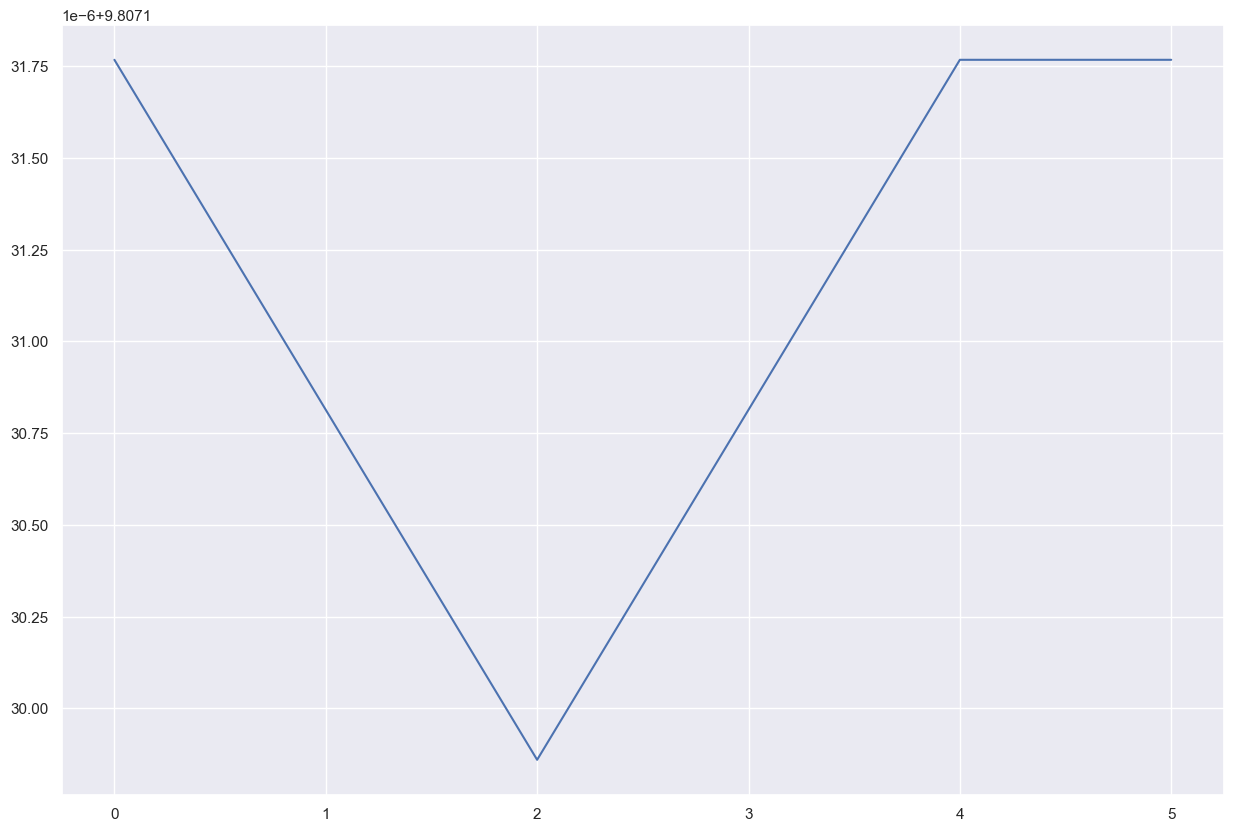

In [41]:
plt.plot(history.history['loss'])

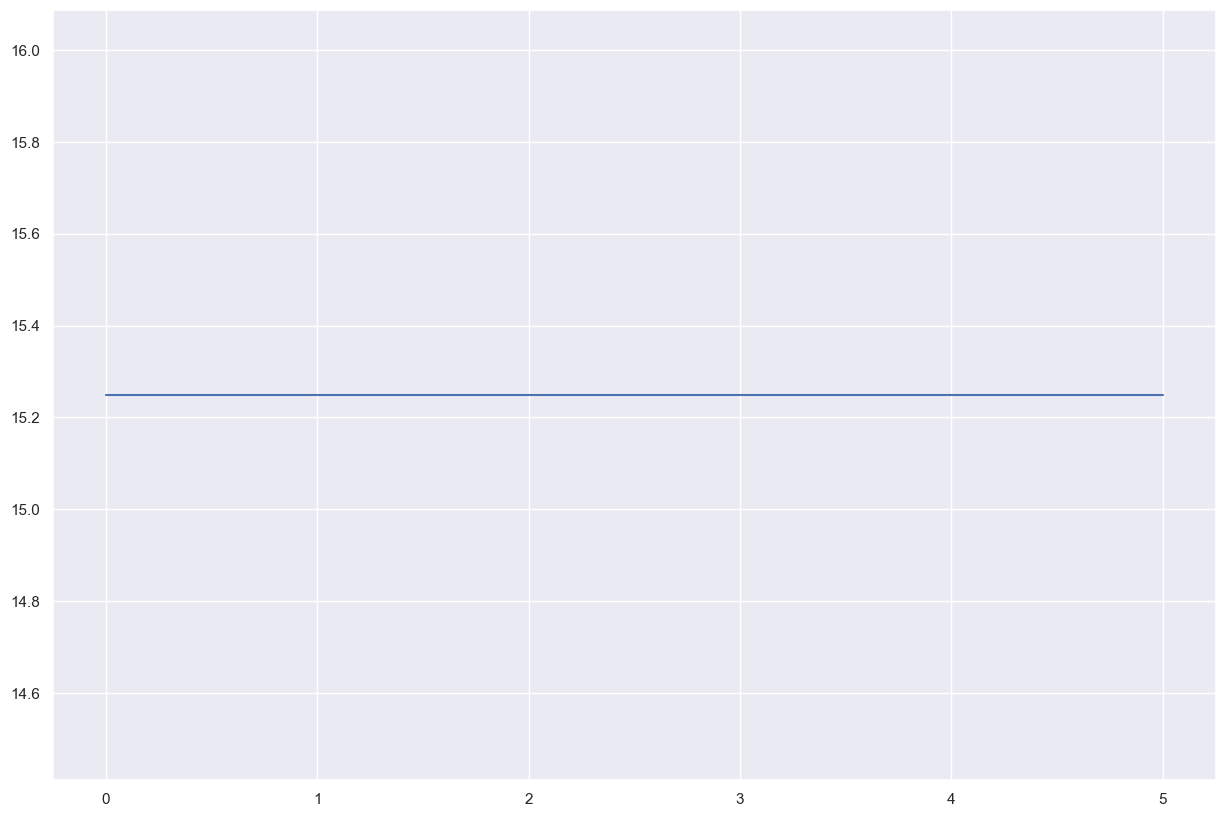

In [42]:
plt.plot(history.history['val_loss'])

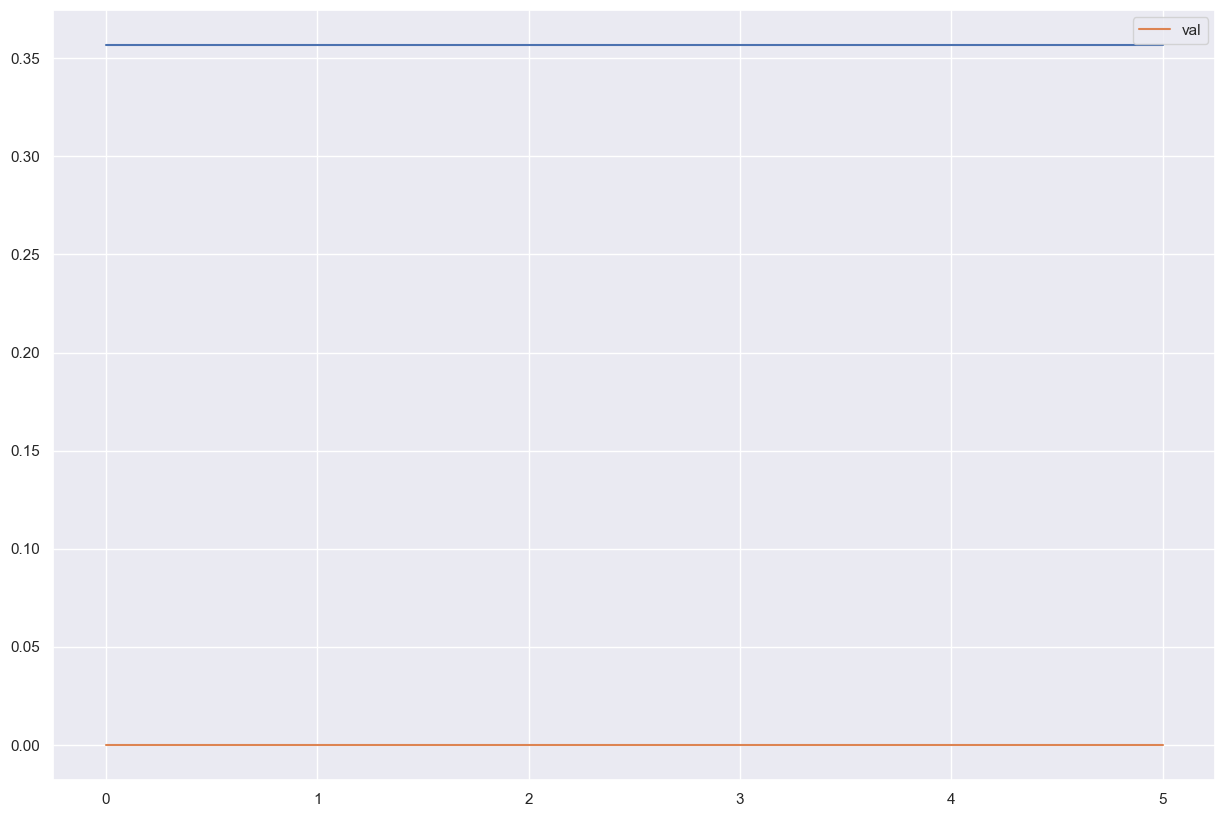

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [45]:
filepath = 'checkpoint folder callback'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]


In [49]:
history = model.fit(x_test,y_test,validation_split=.1,epochs=25,callbacks=[callbacks_list])

Epoch 1/25
1/3 [=========>....................] - ETA: 0s - loss: 10.9604 - accuracy: 0.2812
Epoch 1: val_accuracy improved from 0.00000 to 0.44444, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


3/3 [==============================] - 1s 279ms/step - loss: 9.0366 - accuracy: 0.4074 - val_loss: 8.4718 - val_accuracy: 0.4444
Epoch 2/25
1/3 [=========>....................] - ETA: 0s - loss: 10.4839 - accuracy: 0.3125
Epoch 2: val_accuracy did not improve from 0.44444
3/3 [==============================] - 0s 12ms/step - loss: 9.0366 - accuracy: 0.4074 - val_loss: 8.4718 - val_accuracy: 0.4444
Epoch 3/25
1/3 [=========>....................] - ETA: 0s - loss: 9.0542 - accuracy: 0.4062
Epoch 3: val_accuracy did not improve from 0.44444
3/3 [==============================] - 0s 12ms/step - loss: 9.0366 - accuracy: 0.4074 - val_loss: 8.4718 - val_accuracy: 0.4444
Epoch 4/25
1/3 [=========>....................] - ETA: 0s - loss: 8.5777 - accuracy: 0.4375
Epoch 4: val_accuracy did not improve from 0.44444
3/3 [==============================] - 0s 13ms/step - loss: 9.0366 - accuracy: 0.4074 - val_loss: 8.4718 - val_accuracy: 0.4444
Epoch 5/25
1/3 [=========>....................] - ETA: 0s

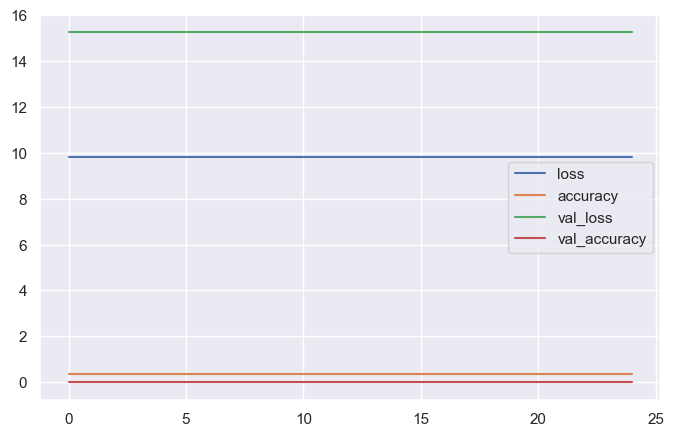

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [48]:
model.load_weights(filepath)

## New ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
model=Sequential()

In [ ]:
model.add(layers.Dense(units=13,activation='relu'))
model.add(layers.Dense(units=26,activation='relu'))
model.add(layers.Dense(units=39,activation='relu'))
model.add(layers.Dense(units=26,activation='relu'))
model.add(layers.Dense(units=1,activation='relu'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x,y,batch_size=32,epochs=20)

In [ ]:
model.evaluate(x_test,y_test)